<a href="https://colab.research.google.com/github/glouwa/app-kandinsky-pattern-generator/blob/master/kandinsky_multilabel_circles_and_stars_count_red%2C_count_yellow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

drive_path = '/content/drive/My Drive/colab/kandinsky'

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libs and Files

In [2]:
!rm -r sample_data 
!wget https://github.com/glouwa/app-kandinsky-pattern-generator/raw/master/lib.py
!wget https://github.com/Hvass-Labs/TensorFlow-Tutorials/raw/master/images/parrot_cropped1.jpg

rm: cannot remove 'sample_data': No such file or directory
--2019-06-07 11:20:04--  https://github.com/glouwa/app-kandinsky-pattern-generator/raw/master/lib.py
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/glouwa/app-kandinsky-pattern-generator/master/lib.py [following]
--2019-06-07 11:20:04--  https://raw.githubusercontent.com/glouwa/app-kandinsky-pattern-generator/master/lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6037 (5.9K) [text/plain]
Saving to: ‘lib.py.4’

lib.py.4            100%[===================>]   5.90K  --.-KB/s    in 0s      

2019-06-07 11:20:04 (110 MB/s) - ‘lib.py.

In [0]:
from IPython.display import display, SVG
from functools import reduce
from random import seed, randint
from numpy import array, argmax
from google.colab import widgets
import google.colab.widgets as colab_widgets
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import PIL
import json
import lib
import random
import os 
import pickle # people say import sPickle as pickle is faster

# Intro



## Encoding
X.shape = (samples, 224, 224, 3)

Y.shape = (samples, ?)

for y we can combine multible properies of a sample. 
the output shape is defined by their amount and encodings.


In [4]:
#@title Common Stuff { vertical-output: true } 

max_count    = 6
image_shape  = (224, 224)

input_shape  = (*image_shape, 3)
output_shape = (max_count*2)

print('learning to count up to', max_count)
print('learning to count red objects, and count yellow objects', max_count)
print('input_shape', input_shape, 'output_shape', output_shape)

model_name       = 'circlesAndStars-countRed-countYellow'
filename_model   = "%s/models/%s.h5"%(drive_path, model_name)
filename_weights = "%s/weights/%s.h5"%(drive_path, model_name)

usedComponents = ['|r|', '|y|']
Ycomponents    = ['%d red', '%d yellow']
Yformat        = ','.join(Ycomponents)

compileY  = lambda s: [*to_onehot(s.counts['|r|']), *to_onehot(s.counts['|y|'])]
Yreadable = lambda s: Yformat%(s.counts['|r|'], s.counts['|y|'])
decodeY   = lambda Y: Yformat%(np.argmax(Y[0:max_count]), np.argmax(Y[max_count:2*max_count]))        
                                     
classesNotFiltered = [Yformat%(r, y) for y in range(0, max_count) for r in range(0, max_count)]

learning to count up to 6
learning to count red objects, and count yellow objects 6
input_shape (224, 224, 3) output_shape 12


In [0]:
fig_id_format   = '%s/fig%06d'
fig_path_format = './figures/%s.pkl'
png_path_format = './images/%s.png'

os.makedirs('./figures/', exist_ok=True)
os.makedirs('./images/', exist_ok=True)

def save_figure(fid, fig):    
    os.makedirs('./figures/%s'%fid.split('/')[0], exist_ok=True)
    #print("create ir", path)
    with open(fig_path_format%fid, 'wb+') as dbfile:
        pickle.dump(fig, dbfile)               

def load_figure(fid):
    with open(fig_path_format%fid, 'rb') as dbfile:
        return pickle.load(dbfile)

def load_pil(fid):
    return PIL.Image.open(png_path_format%fid).resize(image_shape, PIL.Image.LANCZOS)    

def save_pil(fid, pil):
    os.makedirs('./images/%s'%fid.split('/')[0], exist_ok=True)
    pil.save(png_path_format%(fid))

def load_image(path): # used to predict image which are not in sets (like parrot)
    return PIL.Image.open(path).resize(image_shape, PIL.Image.LANCZOS)

to_onehot    = lambda val: [1 if val == i else 0 for i in range(max_count)]
to_line_list = lambda dic: "\n\t".join("{:}: {},".format(k, v) for k, v in dic.items())

count_color  = lambda f, c: reduce(lambda a, e: a + (1 if e.color==c else 0), f, 0)
count_shape  = lambda f, c: reduce(lambda a, e: a + (1 if e.shape==c else 0), f, 0)
count_size   = lambda f, c: reduce(lambda a, e: a + (1 if e.size > c[0] and e.size <= c[1] else 0), f, 0)
count_color_and_shape  = lambda f, c, s: reduce(lambda a, e: a + (1 if e.color==c and e.shape==s else 0), f, 0)

# Sample *s*

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

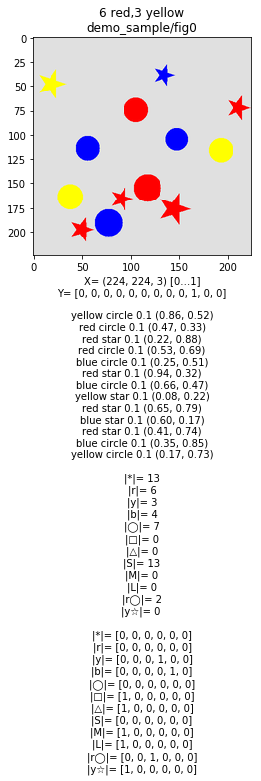

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

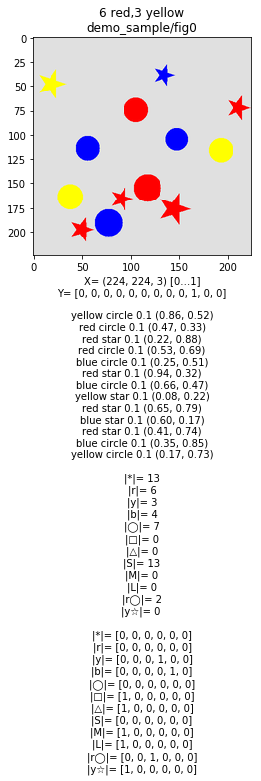

<IPython.core.display.Javascript object>

In [6]:
#@title Create a Sample { vertical-output: true }

default_figure_config = dict(   
    render_size = image_shape,
    obj_count = (2, 15),     
    obj_size = (.1, .5),
    colors = ['red','yellow', 'blue'], #['red','green', 'blue', 'yellow', 'orange'],
    shapes = ['circle', 'star']
)

class Sample:  
    def __init__(self, id, fig_cfg=None):
        #print('touching sample %s/%d'%(set_path, fid))        
        self.ID = id        
        self.f_config = fig_cfg
        
        self.f, pil = self.loadOrGenerate()            
        self.x = {            
            'fig': self.f,
            'pil': pil,
            'arr': array(pil)/255,
            #'url': pil.save(path)
        }
        self.counts = {            
            '|*|': len(self.f),
            '|r|': count_color(self.f, 'red'),
            '|y|': count_color(self.f, 'yellow'),
            '|b|': count_color(self.f, 'blue'),
            '|◯|': count_shape(self.f, 'circle'),
            '|□|': count_shape(self.f, 'rectangle'),
            '|△|': count_shape(self.f, 'triangle'),
            '|S|': count_size(self.f, (.1, .2)),
            '|M|': count_size(self.f, (.2, .4)),
            '|L|': count_size(self.f, (.4, .5)),
            '|r◯|': count_color_and_shape(self.f, 'red', 'circle'),
            '|y☆|': count_color_and_shape(self.f, 'yellow', 'triangle'),            
        }
        self.Yreadable = Yreadable(self)
    
    def loadOrGenerate(self):
        if os.path.isfile(fig_path_format%self.ID):
            self.f = load_figure(self.ID)                                       # schnell
        else:
            self.f = lib.RandomFigure(**self.f_config)
            save_figure(self.ID, self.f)                                        # nicht so schnell
            
        if os.path.isfile(png_path_format%self.ID):
            pil = load_pil(self.ID)                                             # ok vermutlich
        else:
            pil = lib.kandinskyFigureAsImage(self.f, width=image_shape[0])      # ok
            save_pil(self.ID, pil)
        
        return self.f, pil
    
    def __str__(self):        
        return "%s"%self.ID
        
    def compileX(self):      
        return self.x['arr']    
    
    def compileY(self):        
        return compileY(self)
    
    def decodeY(self):
        return decodeY(self)
        
    def compilePandaColumns(self):
        return { 
            **{
                'ID': self.ID, 
                'file': "%s.png"%self.ID.split('/')[1],              
                'Yreadable': self.Yreadable
            },
            **self.counts
        }
    
    def plot(self, verbose=0, title_prefix=None, X=None, Y=None):
        X = X if X is not None else self.x['arr']         
        Y = Y if Y is not None else self.compileY()        
        title_prefix = title_prefix if title_prefix is not None else self.Yreadable
        #print(title_prefix )
        fig_str =  '\n'.join([str(f) for f in self.f])
        x_dim =    '%s [%.0f…%.0f]'%(X.shape, np.min(X), np.max(X))
        counts =   '\n'.join(['%s= %s'%(k, v) for k, v in self.counts.items()])
        encoded =  '\n'.join(['%s= %s'%(k, to_onehot(v)) for k, v in self.counts.items()])        
        
        #plt.xlabel('\n'.join([x_dim, y_str, fig_str, counts, encoded]))
        if verbose == 0: plt.xlabel('X= %s\nY= %s'%(x_dim, Y))        
        if verbose == 1: plt.xlabel('X= %s\nY= %s\n\n%s'%(x_dim, Y, counts))        
        if verbose == 2: plt.xlabel('X= %s\nY= %s\n\n%s\n\n%s \n\n%s'%(x_dim, Y, fig_str, counts, encoded))        
            
        plt.imshow(X)
        plt.title('\n'.join([title_prefix, str(self)]))        
        plt.show()
        
print("Figure Configuration= {\n\t%s\n}"%to_line_list(default_figure_config))

grid = widgets.Grid(1, 2)
with grid.output_to(0, 0):
    example = Sample('demo_sample/fig0', default_figure_config)
    example.plot(verbose=2)    

with grid.output_to(0, 1):
    example_loaded = Sample('demo_sample/fig0', default_figure_config)
    example_loaded.plot(verbose=2)

 # Sample Set

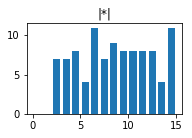

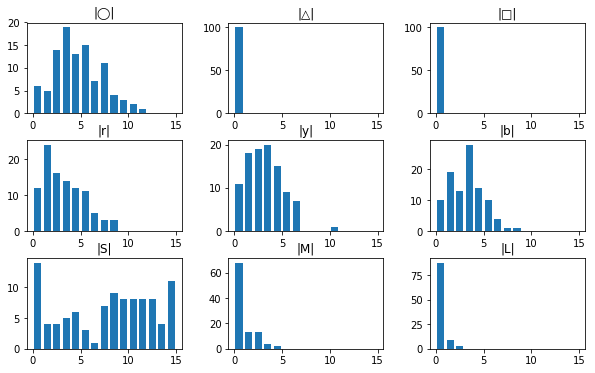

In [7]:
#@title First Batch { vertical-output: true }

def generate_batch(set_path, figure_config, batch_size, batch_idx):  
    #print('generating', n_samples)
    X = list()
    y = list()
    c = list()
    for i in range(0, batch_size):
        ID = fig_id_format%(set_path, batch_idx * batch_size + i)
        s = Sample(ID, figure_config)
        X.append(s.compileX())
        y.append(s.compileY())
        c.append({ 'BID':batch_idx, 'BPOS':i, **s.compilePandaColumns()})

    assert(len(np.array(X).shape) == 4)    
    assert(len(np.array(y).shape) == 2)
    index = pd.RangeIndex(batch_idx*batch_size, (batch_idx+1)*batch_size)
    return array(X), array(y), pd.DataFrame(index=index, data=c)
    
def sklearn_class_weight_from_vector(v):
    classes = f['Yreadable']
    return compute_class_weight(class_weight='balanced', classes=np.unique(classes), y=classes)

def sklearn_class_weight_from_frame(f):
    return sklearn_class_weight_from_vector(f['Yreadable'])
    
def display_batch_stats(f, fig_cfg):    
    max_objects = fig_cfg['obj_count'][1]
    args = { 
        'rwidth': .75,
        'range': (0, max_objects),
        'bins': max_objects,
        'grid': False,
        'align': 'mid' #'left', 'mid', 'right'
    }
    fig = plt.figure(figsize=(10, 6))# tight_layout=True)    
    f.hist(column='|*|', **args, ax=fig.add_subplot(331))    
    fig = plt.figure(figsize=(10, 6))
    f.hist(column='|◯|', **args, ax=fig.add_subplot(331)) # Divide into a 1x4 grid, give first section    
    f.hist(column='|△|', **args, ax=fig.add_subplot(332))
    f.hist(column='|□|', **args, ax=fig.add_subplot(333))    
    f.hist(column='|r|', **args, ax=fig.add_subplot(334))
    f.hist(column='|y|', **args, ax=fig.add_subplot(335))
    f.hist(column='|b|', **args, ax=fig.add_subplot(336))
    f.hist(column='|S|', **args, ax=fig.add_subplot(337))
    f.hist(column='|M|', **args, ax=fig.add_subplot(338))
    f.hist(column='|L|', **args, ax=fig.add_subplot(339))
        
_, _, f = generate_batch('view_batch', default_figure_config, 100, 0)    
display_batch_stats(f, default_figure_config)

In [0]:
# https://github.com/keras-team/keras/issues/12586
from tensorflow.python.keras.utils.data_utils import Sequence

class DataGenerator(Sequence):
#class DataGenerator(keras.utils.Sequence):  
    'Generates kandinsky data for Keras'
    def __init__(self, set_path="err", samples=1000, batch_size=32, in_dim=None, out_dim=None, figure_parameters=None):        
        self.set_path = set_path
        self.figure_parameters = figure_parameters
        self.n_samples = samples        
        self.batch_size = batch_size        
        self.in_dim = in_dim                
        self.out_dim = out_dim
        
    def __len__(self):
        'Denotes the number of batches per epoch'        
        return int(np.floor(self.n_samples / self.batch_size))

    def __getitem__(self, idx):         
        X, y, f = generate_batch(self.set_path, self.figure_parameters, self.batch_size, idx)                
        return X, y
    
    def renderFrame(self):
        panda = pd.DataFrame()
        for idx in range(len(self)):
            X, y, f = generate_batch(self.set_path, self.figure_parameters, self.batch_size, idx)        
            panda = panda.append(f)    
        print(len(self), self.set_path, "Batches touched (%s)"%self.set_path)
        self.panda = PandaSet(
            panda, 
            BPOS_generator=self, 
            output_generator=self
        )
        return self
    
class PandaSet:        
    def __init__(self, f, BPOS_generator=None, output_generator=None):
        "bound to the generator which created the data by BID and BPOS"
        self.f = f
        self.BPOS_generator = BPOS_generator                                                                          # maybe has other row set
        self.output_generator = output_generator                                                                      # fits to f
        
        assert(self.output_generator is None or len(f) - len(self.output_generator)*self.output_generator.batch_size <= self.output_generator.batch_size)
        
        self.classes = np.unique(self.f['Yreadable'])
        self.class_weight = sklearn_class_weight_from_frame(self.f)        
       
    def display_meta(self, fig_cfg):                                                                                  ## about the whole set
        "all abount the set properties"               
        print("\nshape=", self.f.shape)
        t = colab_widgets.TabBar(["Info", "Plots"])    
        with t.output_to(0):
            print("Figure Configuration= {\n\t%s\n}"%to_line_list(fig_cfg))
            print("\nMax |r| in training set=", np.max(self.f['|r|'] + 1))
            print("\nClass names=", self.classes) 
            print("\nsklearn classweights= ", self.class_weight)
            print("\nPanda info=")
            self.f.info()            
        with t.output_to(1): 
            display_batch_stats(self.f, fig_cfg) 

    def display_content_slice(self, slicePanda, sample_view=lambda s, r: s.plot(verbose=1), assert_view=None):        ## just a slice of it
        "show samples in detail"
        "by slice of panda"
        def display_XY():
            visible_samples = slicePanda.stop - slicePanda.start
            grid = colab_widgets.Grid(visible_samples, 2)            
            for i, (row_idx, sample_row) in enumerate(self.f.iloc[slicePanda].iterrows()):
                BID = sample_row['BID']
                BPOS = sample_row['BPOS']
                batch = self.BPOS_generator[BID]                
                with grid.output_to(i, 0): display(batch[0][BPOS])
                with grid.output_to(i, 1): display(batch[1][BPOS])
        def display_sample():
            grid = colab_widgets.Grid(2, slicePanda.stop - slicePanda.start)
            for i, (row_idx, sample_row) in enumerate(self.f.iloc[slicePanda].iterrows()):
                ID = sample_row['ID']
                sample = Sample(ID, default_figure_config)                
                with grid.output_to(0, i):
                    sample_view(sample, sample_row) 
                with grid.output_to(1, i):
                    if assert_view:                        
                        assert_view(sample, sample_row, row_idx, self.output_generator, self.BPOS_generator)
        
        t = colab_widgets.TabBar(["Panda", "Encoded X and Y", "Sample View"])        
        with t.output_to("Panda"): display(self.f.iloc[slicePanda])                                                   # panda slice  
        with t.output_to("Encoded X and Y"): display_XY()                                                             # X and Y encoded            
        with t.output_to("Sample View"): display_sample()            

# Creating Training Data

And cerates the images and figure files

952 train Batches touched (train)
4 valid Batches touched (valid)

shape= (19992, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}

Max |r| in training set= 14

Class names= ['0 red,0 yellow' '0 red,1 yellow' '0 red,2 yellow' '0 red,3 yellow'
 '0 red,4 yellow' '0 red,5 yellow' '0 red,6 yellow' '0 red,7 yellow'
 '0 red,8 yellow' '0 red,9 yellow' '1 red,0 yellow' '1 red,1 yellow'
 '1 red,10 yellow' '1 red,11 yellow' '1 red,2 yellow' '1 red,3 yellow'
 '1 red,4 yellow' '1 red,5 yellow' '1 red,6 yellow' '1 red,7 yellow'
 '1 red,8 yellow' '1 red,9 yellow' '10 red,1 yellow' '10 red,2 yellow'
 '10 red,3 yellow' '10 red,4 yellow' '11 red,1 yellow' '11 red,2 yellow'
 '11 red,3 yellow' '13 red,2 yellow' '2 red,0 yellow' '2 red,1 yellow'
 '2 red,10 yellow' '2 red,2 yellow' '2 red,3 yellow' '2 red,4 yellow'
 '2 red,5 yellow' '2 red,6 yellow' '2 red,7 yellow' '2 red,8 yellow'
 '2 red,9 yellow' '3 red,0 yellow' '3 red,1 yellow' '3 red,10 yellow'
 '3 red,2 yellow' '3 red,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

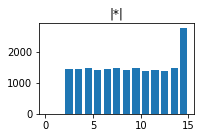

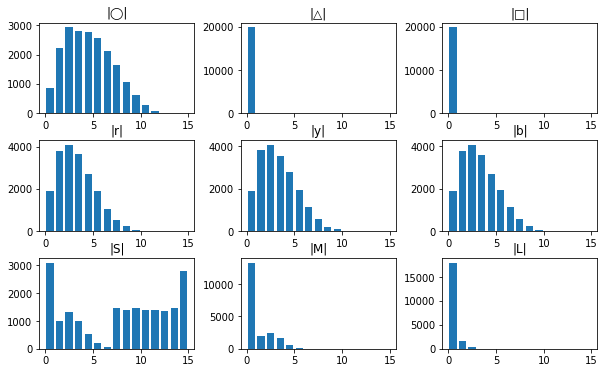

<IPython.core.display.Javascript object>

CPU times: user 56 s, sys: 3.99 s, total: 60 s
Wall time: 59.4 s


In [9]:
#@title Create Training/Validation Set. Show Training Set (f, fig_cfg) { vertical-output: true }
%%time

batch_size      = 21 #@param {type:"slider", min:1, max:200, step:5}
training_size   = 20000 #@param {type:"slider", min:100, max:20000, step:100}
validation_size = 100 #@param {type:"slider", min:100, max:1500, step:10}

params = {
    'figure_parameters': default_figure_config,
    'batch_size': batch_size,
    'in_dim': input_shape,
    'out_dim': output_shape
}

training_generator = DataGenerator(set_path="train", samples=training_size, **params).renderFrame()
validation_generator = DataGenerator(set_path="valid", samples=validation_size, **params).renderFrame()

training_generator.panda.display_meta(params['figure_parameters'])



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BID  BPOS               ID       Yreadable  ... |y☆|  |□|  |△|  |◯|
0    0     0  train/fig000000  5 red,1 yellow  ...    0    0    0    5
1    0     1  train/fig000001  5 red,4 yellow  ...    0    0    0    4
2    0     2  train/fig000002  3 red,1 yellow  ...    0    0    0    2

[3 rows x 17 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

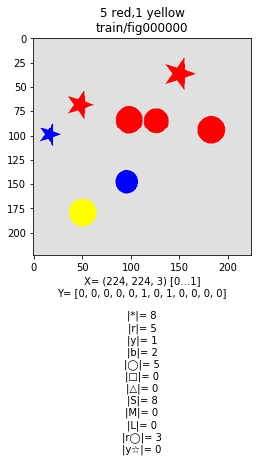

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

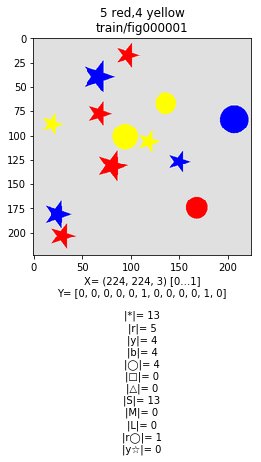

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

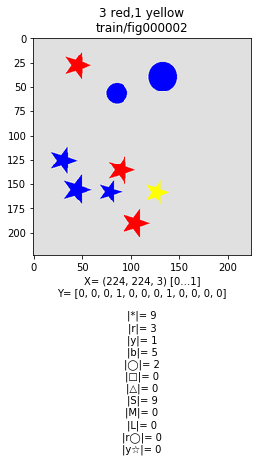

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#@title Review Training Generator Content (X, Y, f) (Sample View) { run: "auto", vertical-output: true }

sample_to_view  = 0 #@param {type:"slider", min:0, max:20000, step:1}
view_len = 3 #@param {type:"slider", min:1, max:20, step:1}

training_generator.panda.display_content_slice(slice(sample_to_view, sample_to_view + view_len))

# Just for Fun: Remove some Samples from Training Set

['0 red,0 yellow', '1 red,0 yellow', '2 red,0 yellow', '3 red,0 yellow', '4 red,0 yellow', '5 red,0 yellow', '0 red,1 yellow', '1 red,1 yellow', '2 red,1 yellow', '3 red,1 yellow', '4 red,1 yellow', '5 red,1 yellow', '0 red,2 yellow', '1 red,2 yellow', '2 red,2 yellow', '3 red,2 yellow', '4 red,2 yellow', '5 red,2 yellow', '0 red,3 yellow', '1 red,3 yellow', '2 red,3 yellow', '3 red,3 yellow', '4 red,3 yellow', '5 red,3 yellow', '0 red,4 yellow', '1 red,4 yellow', '2 red,4 yellow', '3 red,4 yellow', '4 red,4 yellow', '5 red,4 yellow', '0 red,5 yellow', '1 red,5 yellow', '2 red,5 yellow', '3 red,5 yellow', '4 red,5 yellow', '5 red,5 yellow']

shape= (16285, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}

Max |r| in training set= 6

Class names= ['0 red,0 yellow' '0 red,1 yellow' '0 red,2 yellow' '0 red,3 yellow'
 '0 red,4 yellow' '0 red,5 yellow' '1 red,0 yellow' '1 red,1 yellow'
 '1 red,2 yellow' '1 red,3 yellow' '1 red,4 yellow' '1 red,5 yellow'
 '2 red,0 yellow' '2 red,1 yellow' '2 red,2 yellow' '2 red,3 yellow'
 '2 red,4 yellow' '2 red,5 yellow' '3 red,0 yellow' '3 red,1 yellow'
 '3 red,2 yellow' '3 red,3 yellow' '3 red,4 yellow' '3 red,5 yellow'
 '4 red,0 yellow' '4 red,1 yellow' '4 red,2 yellow' '4 red,3 yellow'
 '4 red,4 yellow' '4 red,5 yellow' '5 red,0 yellow' '5 red,1 yellow'
 '5 red,2 yellow' '5 red,3 yellow' '5 red,4 yellow' '5 red,5 yellow']

sklearn classweights=  [0.51282051 2.56410256 2.56410256 1.28205128 2.56410256 1.28205128
 0.85470085 0.28490028 0.51282051 0.64102564 0.85470085 1.28205128
 0.64102564 1.282

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

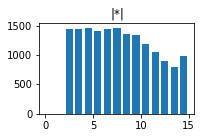

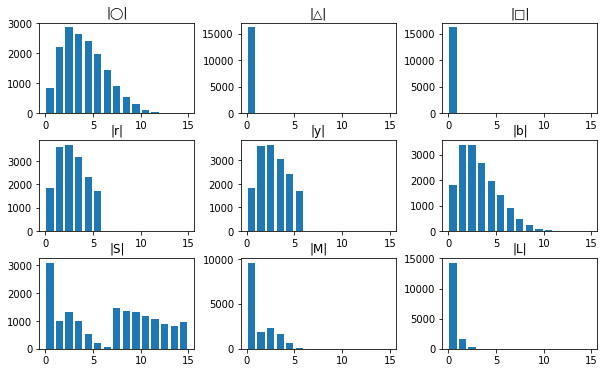

<IPython.core.display.Javascript object>

In [11]:
#@title Select Classes (training_panda → training_panda_filterd) { vertical-output: true }

print(classesNotFiltered)
        
def filter_panda(panda):
    return panda.loc[panda['Yreadable'].isin(classesNotFiltered)]

view_filtered = PandaSet(
    filter_panda(training_generator.panda.f)
)
view_filtered.display_meta(params['figure_parameters'])

# Generator Chain

In [0]:
from keras.preprocessing.image import ImageDataGenerator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BID  BPOS               ID       Yreadable  ... |y☆|  |□|  |△|  |◯|
977   46    11  train/fig000977  5 red,3 yellow  ...    0    0    0    5
978   46    12  train/fig000978  2 red,3 yellow  ...    0    0    0    6
980   46    14  train/fig000980  5 red,3 yellow  ...    0    0    0    7
981   46    15  train/fig000981  3 red,2 yellow  ...    0    0    0    5
983   46    17  train/fig000983  2 red,3 yellow  ...    0    0    0    5

[5 rows x 17 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

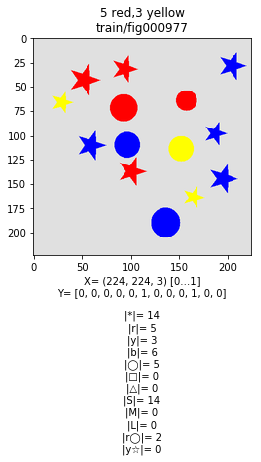

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

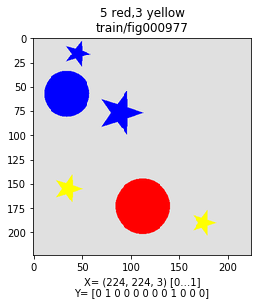

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

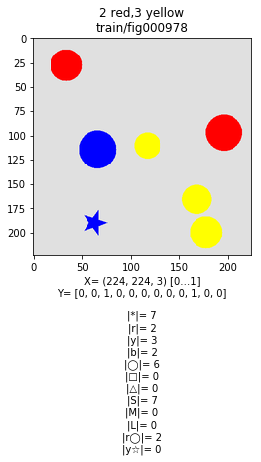

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

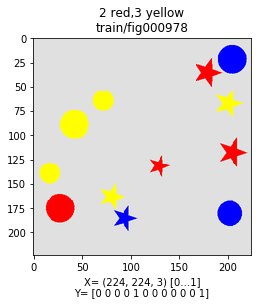

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

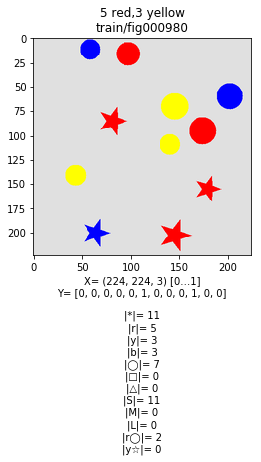

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

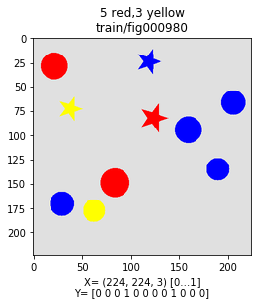

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

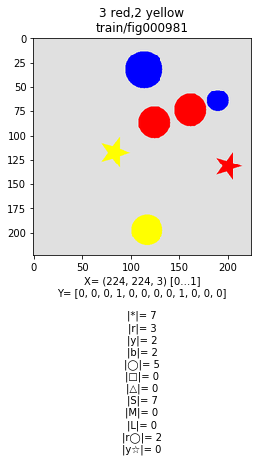

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

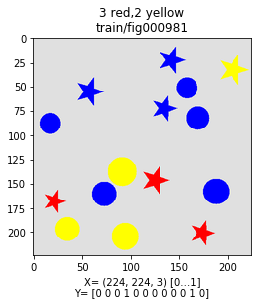

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

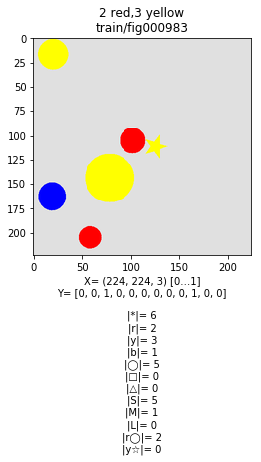

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

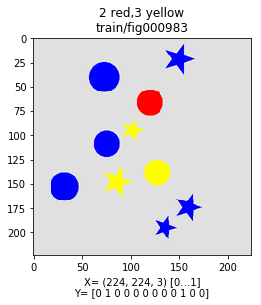

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BID  BPOS               ID       Yreadable  ... |y☆|  |□|  |△|  |◯|
977   46    11  train/fig000977  5 red,3 yellow  ...    0    0    0    5
978   46    12  train/fig000978  2 red,3 yellow  ...    0    0    0    6
980   46    14  train/fig000980  5 red,3 yellow  ...    0    0    0    7
981   46    15  train/fig000981  3 red,2 yellow  ...    0    0    0    5
983   46    17  train/fig000983  2 red,3 yellow  ...    0    0    0    5

[5 rows x 17 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

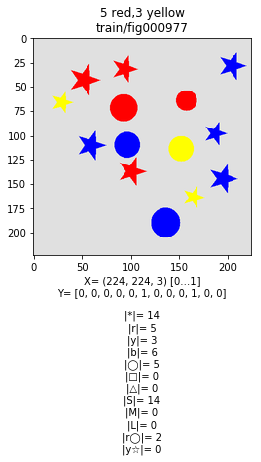

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

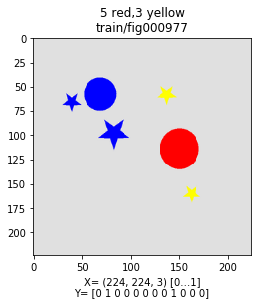

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

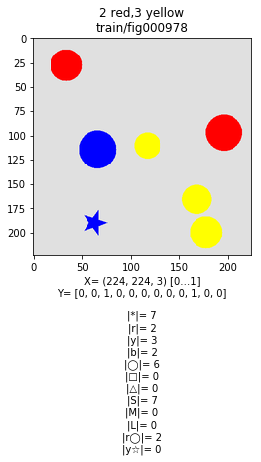

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

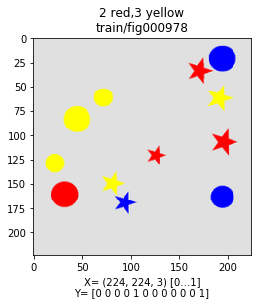

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

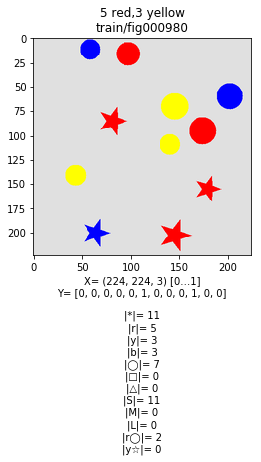

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

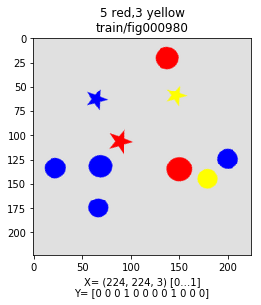

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

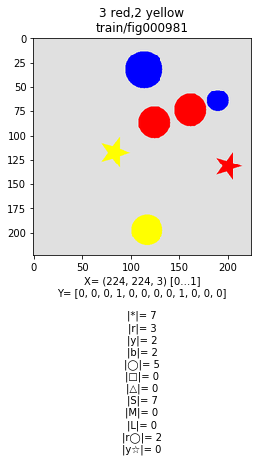

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

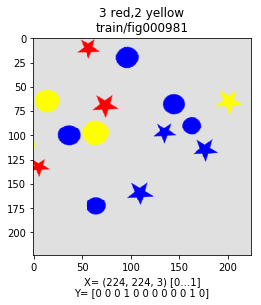

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

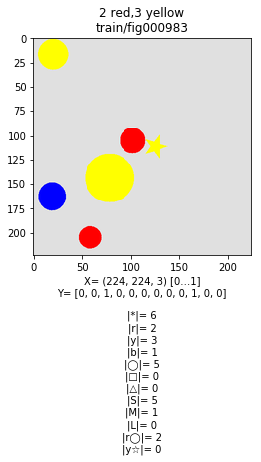

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

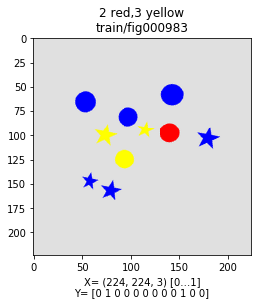

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
#@title Data Augmentation and Y Declaration { run: "auto", vertical-output: true }

argumented_training_generator = ImageDataGenerator(    
    rotation_range = 180,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = [1.0, 1.5],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)
class AugmentationPandaSet(PandaSet):
    def __init__(self, decorated_panda_set, image_generator):        
        super().__init__(
            decorated_panda_set.f, 
            BPOS_generator = decorated_panda_set.BPOS_generator, 
            output_generator = self.AugmentationGenerator(decorated_panda_set.output_generator, image_generator)
        )
        
    class AugmentationGenerator(Sequence): # same element count, but transformed elements
        def __init__(self, decorated_generator, image_generator):
            self.image_generator = image_generator
            self.decorated_generator = decorated_generator
            self.batch_size = decorated_generator.batch_size
            self.last_batch_id = -1

        def __len__(self):        
            return len(self.decorated_generator)

        def __getitem__(self, idx):         
            X, Y = self.getBatchCached(idx)
            return self.image_generator.flow(X, Y, batch_size=self.batch_size, shuffle=False)[0]

        def getBatchCached(self, idx):
            if  self.last_batch_id != idx:
                self.last_batch = self.decorated_generator[idx]
                self.last_batch_id = idx
            return self.last_batch
        pass
    
class FilterPandaSet(PandaSet):  
    def __init__(self, decorated_generator, filter_func=None, new_pandaframe=None):
        self.decorated_generator = decorated_generator
        f = new_pandaframe 
        if filter_func is not None: f = filter_func(self.decorated_generator.panda.f)        
        super().__init__(
            f, 
            BPOS_generator = self.decorated_generator, 
            output_generator = self.FilterByFrameGenerator(self.decorated_generator, f)
        )            
        
    class FilterByFrameGenerator(Sequence): # filters elements
        def __init__(self, decorated_generator, panda_frame):        
            self.decorated_generator = decorated_generator
            self.batch_size = decorated_generator.batch_size
            self.panda_frame = panda_frame
            self.last_batch_id = None

        def __len__(self):        
            return int(len(self.panda_frame) / self.batch_size)

        def __getitem__(self, idx):
            batch_panda = self.panda_frame.iloc[idx*self.batch_size : (idx+1)*self.batch_size]
            X = list()
            Y = list()        
            for i, (row_idx, sample_row) in enumerate(batch_panda.iterrows()):
                batch_id = sample_row['BID']                
                batch_pos = sample_row['BPOS']             # filter braucht immer einen original generator wenn man BID verwendet!
                batch = self.getBatchCached(batch_id)
                X.append(batch[0][batch_pos])
                Y.append(batch[1][batch_pos])

            return np.array(X), np.array(Y)

        def getBatchCached(self, idx):
            if not self.last_batch_id or self.last_batch_id != idx:
                self.last_batch = self.decorated_generator[idx]
                self.last_batch_id = idx
            return self.last_batch
        pass        

sample_to_view = 798 #@param {type:"slider", min:0, max:5000, step:1}
view_len = 5 #@param {type:"slider", min:1, max:20, step:1}
    
training_filtered = FilterPandaSet(training_generator, filter_func=filter_panda)
training_filtered.display_content_slice(
    slice(sample_to_view, sample_to_view+view_len),
    assert_view = lambda s, r, ridx, g, sg: s.plot(
        #print(g.set_path)
        X=g[int(ridx/g.batch_size)][0][ridx%g.batch_size], # brauche sample von  training_augmented.generator
        Y=g[int(ridx/g.batch_size)][1][ridx%g.batch_size], 
        #X=sg[r['BID']][0][r['BPOS']], 
        #Y=sg[r['BID']][1][r['BPOS']]
    )
)

training_augmented = AugmentationPandaSet(training_filtered, argumented_training_generator)
training_augmented.display_content_slice(
    slice(sample_to_view, sample_to_view+view_len),
    assert_view = lambda s, r, ridx, g, sg: s.plot(
        #print(g.set_path)
        X=g[int(ridx/g.batch_size)][0][ridx%g.batch_size], # brauche sample von  training_augmented.generator
        Y=g[int(ridx/g.batch_size)][1][ridx%g.batch_size], 
        #X=sg[r['BID']][0][r['BPOS']], 
        #Y=sg[r['BID']][1][r['BPOS']]
    )
)

validation_filtered = FilterPandaSet(validation_generator, filter_func=filter_panda)
validation_augmented = AugmentationPandaSet(validation_filtered, argumented_training_generator)

# Data ready - Load  VGG16

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

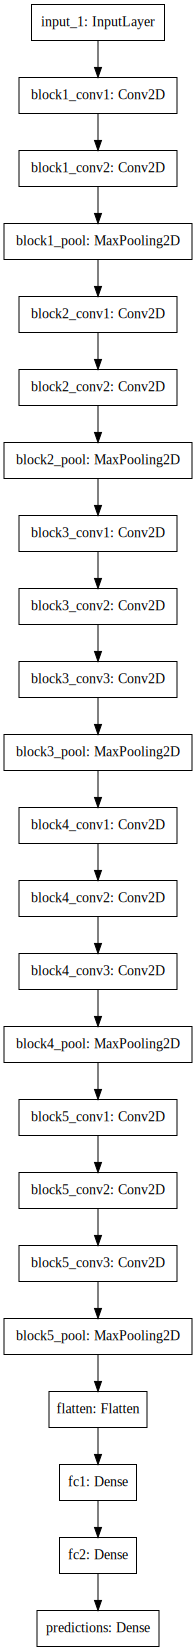

In [14]:
#@title Download VGG16 { vertical-output: true, output-height: 400 }

vgg16_init_weights = 'imagenet' #@param ["'imagenet'", "None"] {type:"raw"}

from tensorflow.python.keras.applications import VGG16

vgg16model = VGG16(include_top=True, weights=vgg16_init_weights)
vgg16model.summary()
SVG(keras.utils.vis_utils.model_to_dot(vgg16model).create(prog='dot', format='svg'))

In [15]:
pip install innvestigate

In [0]:
import innvestigate
import innvestigate.utils
import keras.applications.vgg16 as vgg16
#from tensorflow.python.keras.applications import VGG16

In [0]:
def innvestigate_image(model, img):
    model = innvestigate.utils.model_wo_softmax(model)
    
    ['input', 'random', 'gradient', 'gradient.baseline', 'input_t_gradient', 'deconvnet', 'guided_backprop', 'integrated_gradients', 'smoothgrad', 
      'lrp', 'lrp.z', 'lrp.z_IB', 'lrp.epsilon', 'lrp.epsilon_IB', 'lrp.w_square', 'lrp.flat', 'lrp.alpha_beta', 'lrp.alpha_2_beta_1', 'lrp.alpha_2_beta_1_IB', 'lrp.alpha_1_beta_0', 'lrp.alpha_1_beta_0_IB', 'lrp.z_plus', 'lrp.z_plus_fast',
      'lrp.sequential_preset_a', 'lrp.sequential_preset_b', 'lrp.sequential_preset_a_flat', 'lrp.sequential_preset_b_flat', 
      'deep_taylor', 'deep_taylor.bounded', 'deep_lift.wrapper', 'pattern.net', 'pattern.attribution']
    
    innvestigate_methods = ['deep_taylor', 'gradient']
    grid = colab_widgets.Grid(1, len(innvestigate_methods))    
    for i, analyser_str in enumerate(innvestigate_methods):
        with grid.output_to(0, i):
            
            analyzer = innvestigate.create_analyzer(analyser_str, model)        
            a = analyzer.analyze(x)    
            a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
            a /= np.max(np.abs(a))
            plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
            plt.show()

model = vgg16.VGG16() # VGG16

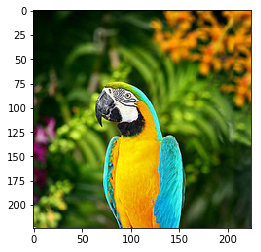

79.02% : macaw
 6.61% : bubble
 3.64% : vine_snake
 1.90% : pinwheel
 1.22% : knot


In [18]:
#@title Make a prediction with vgg16 imagenet weights{ vertical-output: true }

from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions

def predict(image_array):
    plt.imshow(image_array)
    plt.show()
    
    img_array = np.expand_dims(image_array, axis=0)   
    
    pred = vgg16model.predict(img_array)
    pred_decoded = decode_predictions(pred)[0]
    
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))  
        
predict(load_image('parrot_cropped1.jpg'))
#predict(image_path=image_paths_train[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

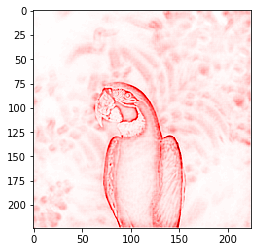

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

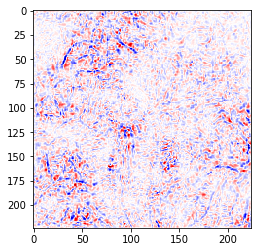

<IPython.core.display.Javascript object>

In [24]:
#@title { vertical-output: true }
arr =  np.array((load_image('parrot_cropped1.jpg')))/255
x = arr[None]
innvestigate_image(model, x)

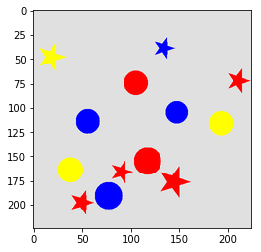

 5.54% : envelope
 5.15% : mosquito_net
 4.64% : shower_curtain
 2.95% : toilet_tissue
 2.42% : tray


In [20]:
#@title predict a Kandinsky Figure with VGG16 imagenet weights { vertical-output: true }
predict(example.x['arr'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

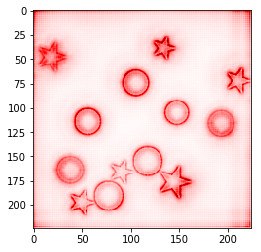

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

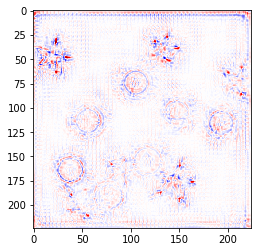

<IPython.core.display.Javascript object>

In [21]:
#@title { vertical-output: true }
arr =  example.x['arr']
x = arr[None]
innvestigate_image(model, x)

# Creating a Model: VGG16[0:block5_pool] + 2 new Dense Layers

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                12300     
Total params: 40,418,124
Trainable params: 40,418,124
Non-trainable params: 0
_________________________________________________________________


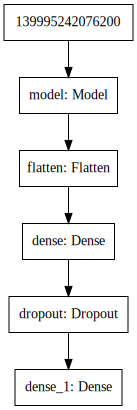

In [22]:
#@title Creating a new Model { vertical-output: true, output-height: 300 }
n1           = 100 #@param {type:"slider", min:1, max:500, step:1}
n2           = 50 #@param {type:"slider", min:1, max:500, step:1}

from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.optimizers import Adam, RMSprop

conv_model = Model(inputs=vgg16model.input, outputs=vgg16model.get_layer('block5_pool').output)

new_model = Sequential()
new_model.add(conv_model)
new_model.add(Flatten())
new_model.add(Dense(1024, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(output_shape, activation='softmax'))

new_model.summary()
SVG(keras.utils.vis_utils.model_to_dot(new_model).create(prog='dot', format='svg'))

# Training

In [0]:
#used_training_generator = training_generator                   # the unfiltered first DataGenerator 
#used_training_generator = training_filtered.generator
used_training_generator = training_augmented.output_generator

class_weight = training_filtered.class_weight

#used_validation_generator = validation_filtered.generator
used_validation_generator = validation_augmented.output_generator



Raw: len=775, batch_size=21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

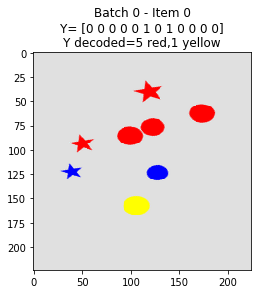

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

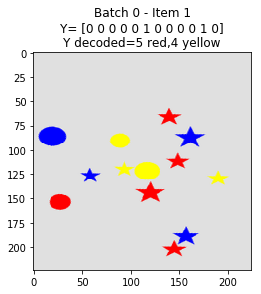

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

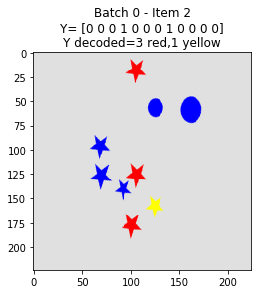

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

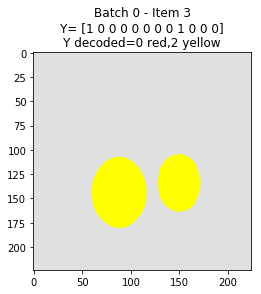

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

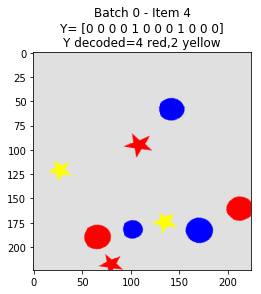

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

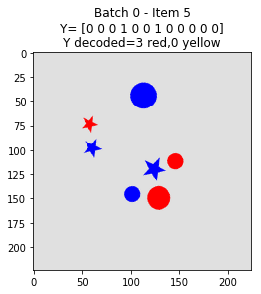

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

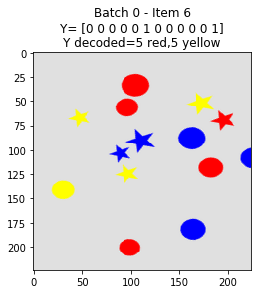

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

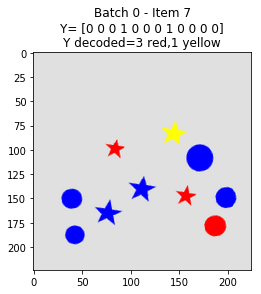

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

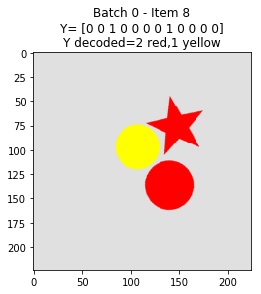

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

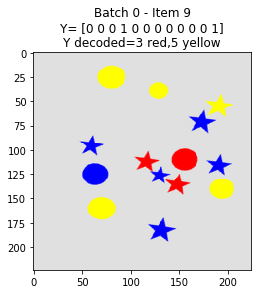

<IPython.core.display.Javascript object>

In [26]:
def show_batches(name, generator):    
    print("\n%s: len=%d, batch_size=%d"%(name, len(generator), generator.batch_size))
    #generator.reset()?
    
    batch_to_view = 0 #@param {type:"slider", min:0, max:100, step:3}
    batch_view_len = 10 #@param {type:"slider", min:1, max:20, step:1}
    
    X = generator[batch_to_view][0]
    Y = generator[batch_to_view][1]
    
    image_count = min(batch_view_len, generator.batch_size)
    
    grid = widgets.Grid(1, batch_view_len)
    for i in range(image_count):
        with grid.output_to(0, i):        
            plt.title('Batch %d - Item %d\nY= %s\nY decoded=%s'%(batch_to_view, i, Y[i], Sample.decodeY(Y[i])))
            # assert X = Sample(id=batch*batch_size+i).X
            plt.imshow(X[i])
            plt.show()

show_batches('Raw', used_training_generator)

In [0]:
#@title Compile after trainable Layers are set { vertical-output: true }
optimizer     = "adam"                            #@param ["adam" ,"other"]
learning_rate = 0.01                              #@param {type:"slider", min:1e-7, max:0.01, step:1e-3}
loss          = "binary_crossentropy" #@param ["categorical_crossentropy", "sparse_categorical_crossentropy", "binary_crossentropy"]
main_metric   = "accuracy"     #@param ["accuracy", "categorical_accuracy", "sparse_categorical_accuracy"]
train_vgg16   = True #@param {type:"boolean"}

print("Trainable Layers:", ' '.join([str(layer.trainable) for layer in conv_model.layers]), '\n')

conv_model.trainable = train_vgg16
for layer in conv_model.layers: layer.trainable = train_vgg16
    
new_model.compile(
    optimizer = Adam(lr=1e-5), 
    loss = loss, 
    metrics = [main_metric]
)

print("Trainable Layers:", ' '.join([str(layer.trainable) for layer in conv_model.layers]), '\n')

In [0]:
#@title Training { vertical-output: true }
%%time

steps_per_epoch    = 112 #@param {type:"slider", min:10, max:500, step:1}
epochs             = 5 #@param {type:"slider", min:1, max:50, step:1}
learning_rate      = 30 #@param {type:"slider", min:1, max:50, step:1}
trained_layers     = 'dense' #@param ["'all'", "'dense'", "'vgg16[5,6]'"] {type:"raw"}
use_multprocessing = False #@param {type:"boolean"}
workers            = 8 #@param {type:"slider", min:1, max:64, step:1}
verbose            = 1 #@param {type:"slider", min:0, max:5, step:1}

print(
    "batch_size=", used_training_generator.batch_size, 
    "batch_count=", len(used_training_generator), 
    "samples*=", used_training_generator.batch_size * len(used_training_generator), 
    "\nepochs=", epochs, 
    "steps_per_epoch=", steps_per_epoch, 
    "samples_per_step*=", int(used_training_generator.batch_size * len(used_training_generator) 
                              / steps_per_epoch)
)

fit_result1 = new_model.fit_generator(    
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,    
    
    generator = used_training_generator,  
    validation_data = used_validation_generator,
    
    class_weight = class_weight,
    #use_multiprocessing = use_multprocessing,    
    #workers = workers,
    verbose = verbose
)

main_metric = 'acc'

def plot_metric(history, m):        
        plt.plot(history[m])
        plt.plot(history['val_%s'%m])
        plt.title('Model %s'%m)
        plt.ylabel(m)
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
    
def plot_history(history):    
    plot_metric(history, main_metric)
    plot_metric(history, 'loss')
    print(main_metric,          "=", history[main_metric][-1])
    print("val_%s"%main_metric, "=", history["val_%s"%main_metric][-1])

#history_merge =  merge_history(history_merge, fit_result2.history) if history_merge else fit_result1.history
history_merge = fit_result1.history
plot_history(history_merge)

In [0]:
#@title Training { vertical-output: true }
%%time

epochs             = 5 #@param {type:"slider", min:1, max:50, step:1}
learning_rate      = 2 #@param {type:"slider", min:1, max:50, step:1}
trained_layers     = 'all' #@param ["'all'", "'Dense'", "'vgg16[5,6]+Dense'"] {type:"raw"}

fit_result2 = new_model.fit_generator(    
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,    
    
    generator = used_training_generator,  
    validation_data = used_validation_generator,
    
    class_weight = class_weight,
    #use_multiprocessing = use_multprocessing,    
    #workers = workers,
    verbose = verbose
)

print(main_metric, "=", fit_result2.history[main_metric][-1])

def merge_history(h1, h2):
    assert(h1.keys() == h2.keys())
    history_merge_values = list(map(lambda ek: h1[ek] + h2[ek], h1.keys()))
    return dict(zip(h1.keys(), history_merge_values)) 
    
history_merge = merge_history(history_merge, fit_result2.history)    
plot_history(history_merge)

# Checkpoint

In [0]:
#new_model.save(model_name)
new_model.save_weights(filename_weights)

In [0]:
new_model_loaded = new_model
new_model_loaded.load_weights(filename_weights)

# Test Set 1

In [33]:
#@title Data Generators for test { vertical-output: true }
%%time
batch_size      = 31 #@param {type:"slider", min:1, max:200, step:5}
test_size       = 30000 #@param {type:"slider", min:100, max:30000, step:10}

test_params = {
    'figure_parameters': default_figure_config,
    'batch_size': batch_size,
    'in_dim': input_shape,
    'out_dim': output_shape
}

print("Figure Configuration= {\n\t%s\n}"%to_line_list(test_params['figure_parameters']))
test_generator = DataGenerator(set_path="test", samples=test_size, **test_params).renderFrame()

print("Generated class count of test set=", np.max(test_generator.panda.f['|r|']))

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}
967 test Batches touched (test)
Generated class count of test set= 11
CPU times: user 7min 32s, sys: 6.63 s, total: 7min 39s
Wall time: 7min 39s



shape= (29977, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}

Max |r| in training set= 12

Class names= ['0 red,0 yellow' '0 red,1 yellow' '0 red,10 yellow' '0 red,12 yellow'
 '0 red,2 yellow' '0 red,3 yellow' '0 red,4 yellow' '0 red,5 yellow'
 '0 red,6 yellow' '0 red,7 yellow' '0 red,8 yellow' '0 red,9 yellow'
 '1 red,0 yellow' '1 red,1 yellow' '1 red,10 yellow' '1 red,11 yellow'
 '1 red,12 yellow' '1 red,2 yellow' '1 red,3 yellow' '1 red,4 yellow'
 '1 red,5 yellow' '1 red,6 yellow' '1 red,7 yellow' '1 red,8 yellow'
 '1 red,9 yellow' '10 red,0 yellow' '10 red,1 yellow' '10 red,2 yellow'
 '10 red,3 yellow' '10 red,4 yellow' '10 red,5 yellow' '11 red,1 yellow'
 '11 red,2 yellow' '11 red,3 yellow' '2 red,0 yellow' '2 red,1 yellow'
 '2 red,10 yellow' '2 red,11 yellow' '2 red,2 yellow' '2 red,3 yellow'
 '2 red,4 yellow' '2 red,5 yellow' '2 red,6 yellow' '2 red,7 yellow'
 '2 red,8 yellow' '2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

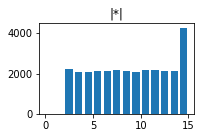

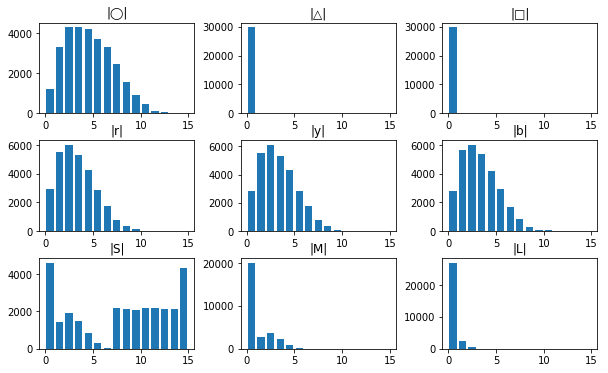

<IPython.core.display.Javascript object>

In [34]:
#@title Test set { run: "auto", vertical-output: true }
test_generator.panda.display_meta(test_params['figure_parameters'])



shape= (24172, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}

Max |r| in training set= 6

Class names= ['0 red,0 yellow' '0 red,1 yellow' '0 red,2 yellow' '0 red,3 yellow'
 '0 red,4 yellow' '0 red,5 yellow' '1 red,0 yellow' '1 red,1 yellow'
 '1 red,2 yellow' '1 red,3 yellow' '1 red,4 yellow' '1 red,5 yellow'
 '2 red,0 yellow' '2 red,1 yellow' '2 red,2 yellow' '2 red,3 yellow'
 '2 red,4 yellow' '2 red,5 yellow' '3 red,0 yellow' '3 red,1 yellow'
 '3 red,2 yellow' '3 red,3 yellow' '3 red,4 yellow' '3 red,5 yellow'
 '4 red,0 yellow' '4 red,1 yellow' '4 red,2 yellow' '4 red,3 yellow'
 '4 red,4 yellow' '4 red,5 yellow' '5 red,0 yellow' '5 red,1 yellow'
 '5 red,2 yellow' '5 red,3 yellow' '5 red,4 yellow' '5 red,5 yellow']

sklearn classweights=  [0.51282051 2.56410256 2.56410256 1.28205128 2.56410256 1.28205128
 0.85470085 0.28490028 0.51282051 0.64102564 0.85470085 1.28205128
 0.64102564 1.282

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

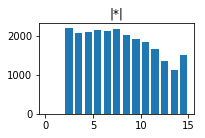

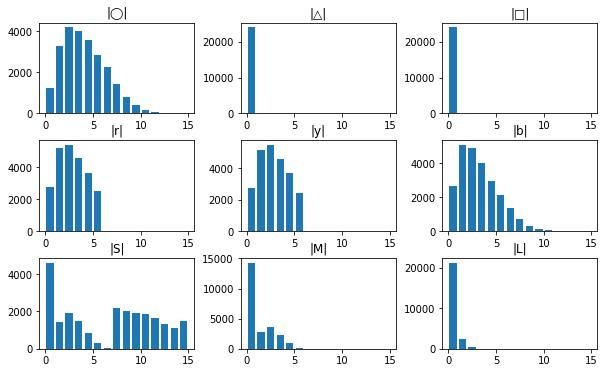

<IPython.core.display.Javascript object>

In [35]:
#@title Use same filter for test set { run: "auto", vertical-output: true }

test_filtered = FilterPandaSet(test_generator, filter_func=filter_panda)
test_filtered.display_meta(test_params['figure_parameters'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BID  BPOS              ID       Yreadable  ... |y☆|  |□|  |△|  |◯|
6930  223    17  test/fig006930  2 red,1 yellow  ...    0    0    0    2
6931  223    18  test/fig006931  0 red,0 yellow  ...    0    0    0    1
6932  223    19  test/fig006932  0 red,0 yellow  ...    0    0    0    1

[3 rows x 17 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

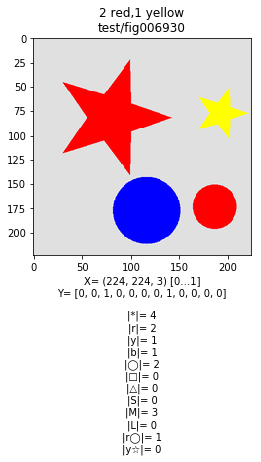

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

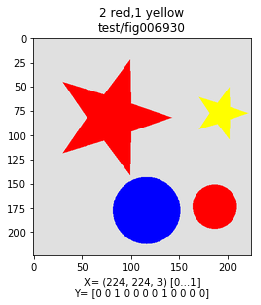

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

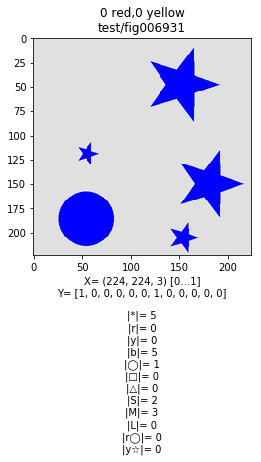

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

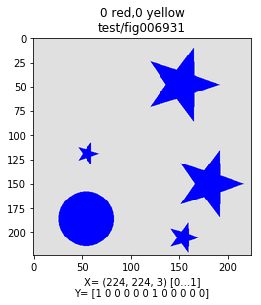

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

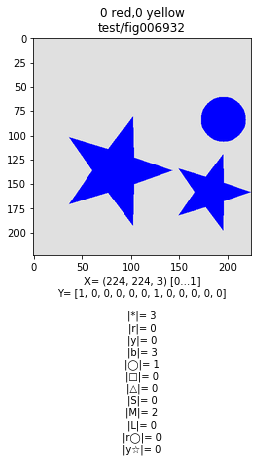

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

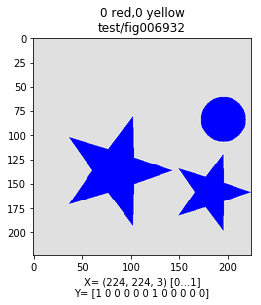

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
#@title Review Train Generator { run: "auto", vertical-output: true }

sample_to_view  = 5591 #@param {type:"slider", min:0, max:20000, step:1}
view_len = 3 #@param {type:"slider", min:1, max:20, step:1}

test_filtered.display_content_slice(
    slice(sample_to_view, sample_to_view + view_len),
    assert_view = lambda s, r, ridx, g, sg: s.plot(        
        X=sg[r['BID']][0][r['BPOS']], 
        Y=sg[r['BID']][1][r['BPOS']]
    )
)

# Evaluation 1

In [54]:
#@title Test Metrics { run: "auto", vertical-output: true }

used_test_generator = test_filtered.output_generator
used_test_panda = test_filtered.f

eval_result = new_model.evaluate_generator(used_test_generator, verbose=1)
print("Accuracy %s" % eval_result[1])

AttributeError: ignored

In [55]:
#@title Predict and add Prediction to panda { vertical-output: true }

y_pred = new_model.predict_generator(used_test_generator, verbose=1)
y_pred_str = [Sample.decodeY(Y) for Y in y_pred]
  
print("predicted=", len(y_pred_str))
print("panda", used_test_panda.shape)

raw_panda = used_test_panda.iloc[0:len(y_pred_str)].copy()
raw_panda['Ypredicted'] = y_pred_str

mask = (raw_panda['Yreadable'] != raw_panda['Ypredicted'])

print("\nnumber of falsy predictions", np.sum(mask))
print("\nnumber of correct predictions", np.sum(~mask))

raw_panda['mask'] = mask

779/779 [==============================] - 134s 172ms/step
predicted= 24149
panda (24172, 17)

number of falsy predictions 270

number of correct predictions 23879



shape= (270, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Figure Configuration= {
	render_size: (224, 224),
	obj_count: (2, 15),
	obj_size: (0.1, 0.5),
	colors: ['red', 'yellow', 'blue'],
	shapes: ['circle', 'star'],
}

Max |r| in training set= 6

Class names= ['0 red,5 yellow' '1 red,2 yellow' '1 red,3 yellow' '1 red,4 yellow'
 '1 red,5 yellow' '2 red,2 yellow' '2 red,3 yellow' '2 red,4 yellow'
 '2 red,5 yellow' '3 red,0 yellow' '3 red,1 yellow' '3 red,2 yellow'
 '3 red,3 yellow' '3 red,4 yellow' '3 red,5 yellow' '4 red,0 yellow'
 '4 red,1 yellow' '4 red,2 yellow' '4 red,3 yellow' '4 red,4 yellow'
 '4 red,5 yellow' '5 red,0 yellow' '5 red,1 yellow' '5 red,2 yellow'
 '5 red,3 yellow' '5 red,4 yellow' '5 red,5 yellow']

sklearn classweights=  [0.51282051 2.56410256 2.56410256 1.28205128 2.56410256 1.28205128
 0.85470085 0.28490028 0.51282051 0.64102564 0.85470085 1.28205128
 0.64102564 1.28205128 0.64102564 1.28205128 1.28205128 2.56410256
 1.28205128 2.56410256 1.28205128 0.64102564 0.64102564 0.51282051
 0.64102564 2.56410256 1.28205128 2.56

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

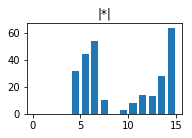

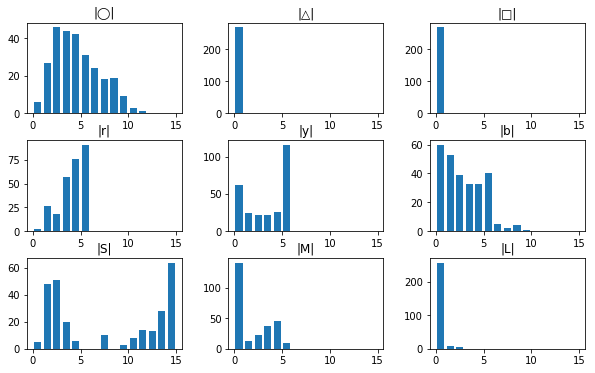

<IPython.core.display.Javascript object>

In [56]:
#@title Create Set of Errors { vertical-output: true }

error_set = FilterPandaSet(used_test_generator, new_pandaframe=raw_panda[mask])
error_set.display_meta(test_params['figure_parameters'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BID  BPOS              ID  ... |◯|      Ypredicted  mask
17113  552     1  test/fig017113  ...   3  2 red,0 yellow  True
17331  559     2  test/fig017331  ...  11  4 red,4 yellow  True
17374  560    14  test/fig017374  ...   3  2 red,0 yellow  True

[3 rows x 19 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137]],

       ...,

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

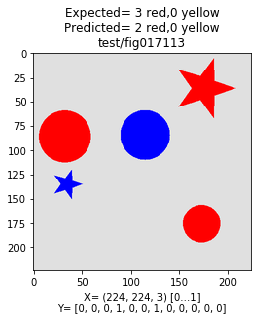

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

len(g) 8


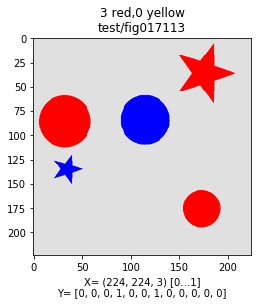

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

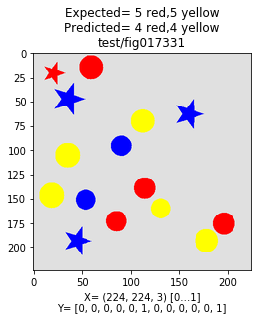

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

len(g) 8


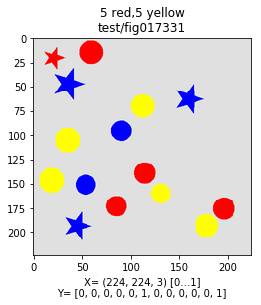

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

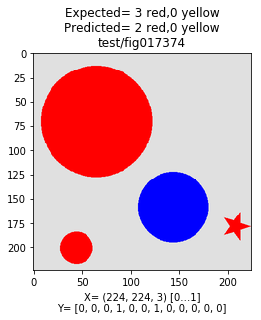

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

len(g) 8


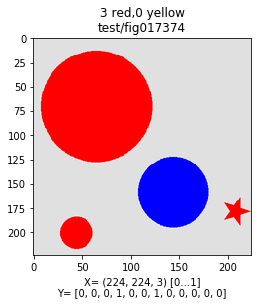

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
#@title View Error Samples { run: "auto", vertical-output: true } 
sample_to_view  = 151 #@param {type:"slider", min:0, max:2000, step:1}
view_len = 3 #@param {type:"slider", min:1, max:25, step:1}

def plot_err(s, r, ridx, g, sg):
    print('len(g)', len(g))
    s.plot(        
        #X=g[int(ridx/g.batch_size)][0][ridx%g.batch_size], # brauche sample von  training_augmented.generator
        #Y=g[int(ridx/g.batch_size)][1][ridx%g.batch_size], 
        #X=gs[r['BID']][0][r['BPOS']], 
        #Y=gs[r['BID']][1][r['BPOS']]
    )

error_set.display_content_slice(
    slice(sample_to_view, sample_to_view + view_len), 
    sample_view = lambda s, r: s.plot(verbose=0, title_prefix = "Expected= %s\nPredicted= %s"%(r['Yreadable'], r['Ypredicted'])), 
    assert_view = plot_err
)

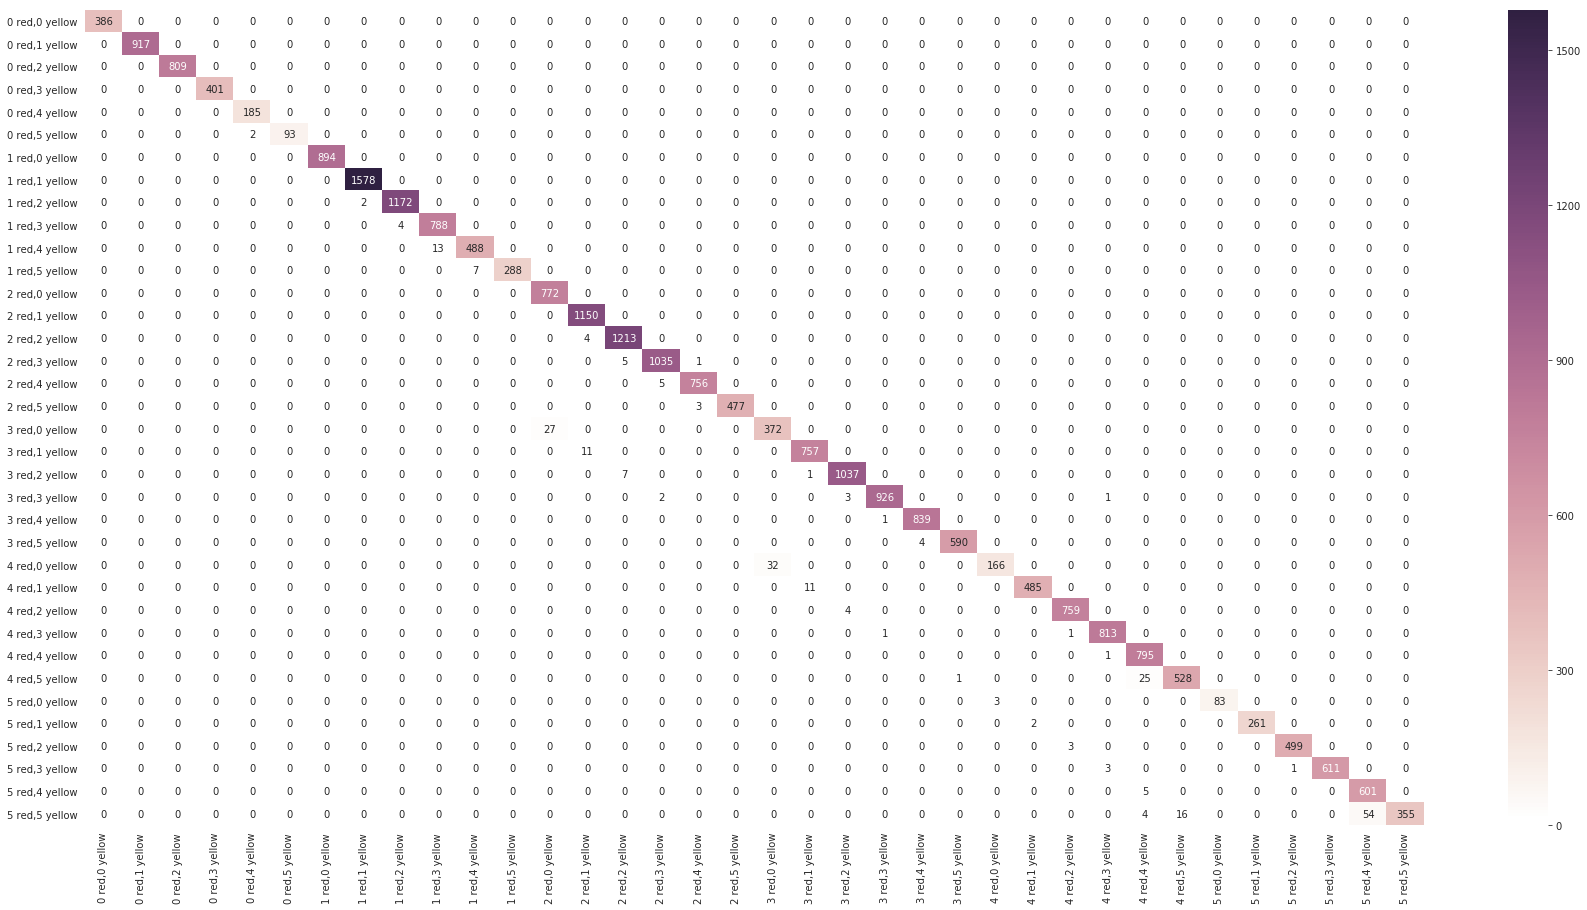

In [58]:
#@title Confusion Matrix { run: "auto", vertical-output: true } 

from sklearn.metrics import confusion_matrix
import seaborn as sn

sn.set_style("white")

cm = confusion_matrix(y_true=raw_panda['Yreadable'], y_pred=raw_panda['Ypredicted'], labels=test_filtered.classes) 



df_cm = pd.DataFrame(cm, test_filtered.classes, test_filtered.classes)
plt.figure(figsize = (30,15))
# ylabel what it really is
# xlabel predicted

sn.heatmap(
    df_cm, 
    center=800, 
    annot=True, fmt="", 
    cmap=sn.cubehelix_palette(light=1, as_cmap=True)
) 
plt.show()

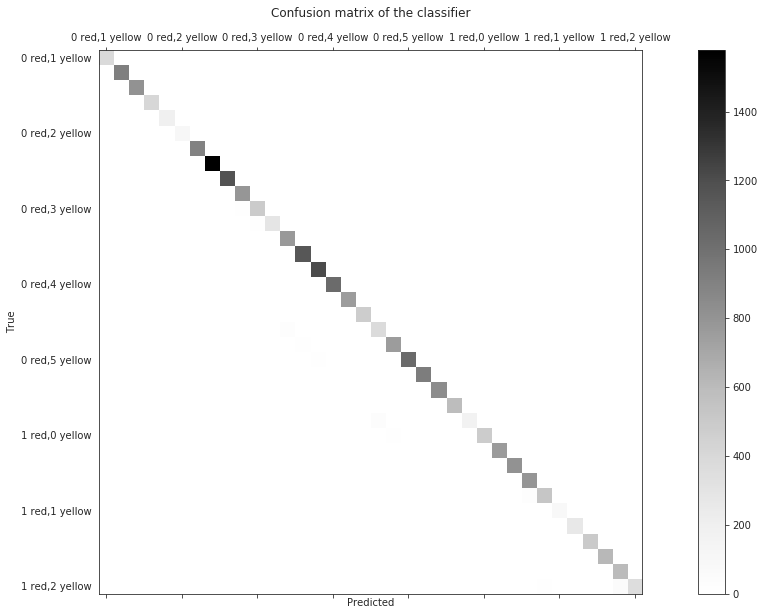

In [59]:
#@title With pyplot { run: "auto", vertical-output: true } 
labels = test_filtered.classes
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.get_cmap('Greys'))
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
#https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=8YCVGqZkJJxT

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
    '''))
    init_notebook_mode(connected=False)

In [61]:
#@title Plotly { run: "auto", vertical-output: true } 

from plotly.offline import iplot
import plotly.graph_objs as go

enable_plotly_in_cell()

data = [
    go.Heatmap(
        z=cm,
        x=test_filtered.classes,
        y=test_filtered.classes,
        colorscale=[
            [0,       'rgb(250, 250, 250)'],
            [1./1000, 'rgb(200, 200, 200)'],            
            [1.,      'rgb(0, 0, 0)'],      
        ],
    )
]
layout = go.Layout(
    autosize=False,
    width=600,
    height=600,
    margin=go.layout.Margin(
        l=150,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

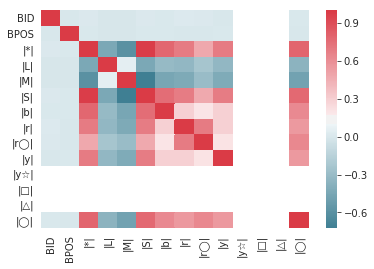

In [62]:
#@title Correlations Matrix { run: "auto", vertical-output: true } 

corr = used_test_panda.loc[:,used_test_panda.dtypes == 'int64'].corr()
sn.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    cmap=sn.diverging_palette(220, 10, as_cmap=True)
)
plt.show()

<Figure size 720x720 with 0 Axes>

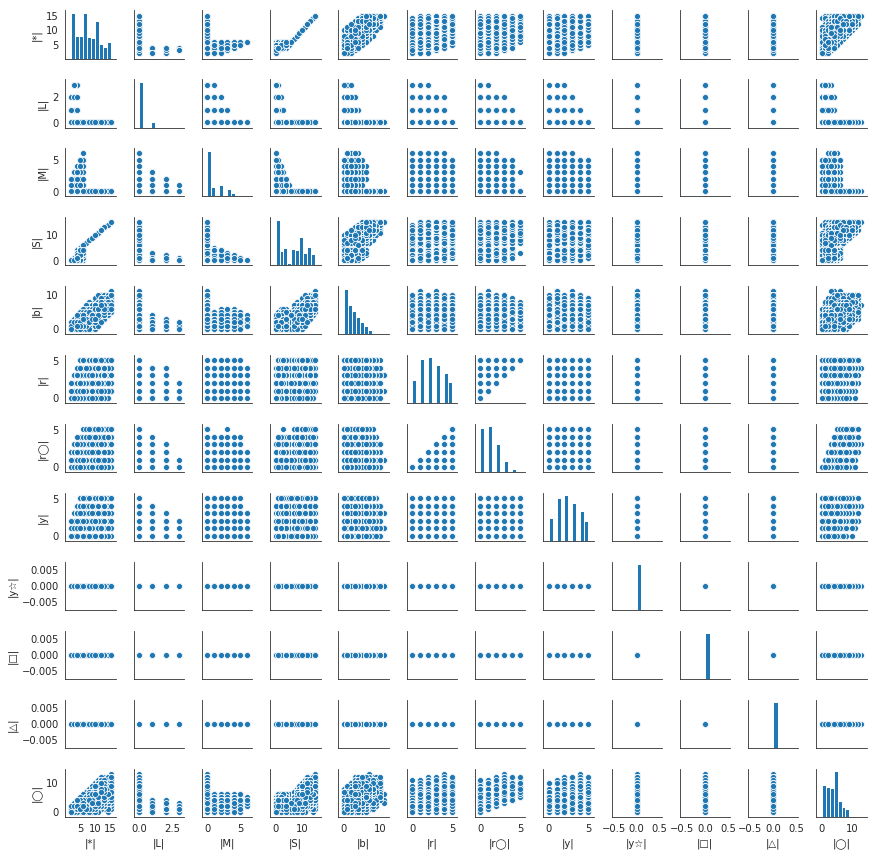

In [63]:
#@title Pair plot { run: "auto", vertical-output: true } 

plt.figure(figsize=(10, 10))
colfilter = (used_test_panda.dtypes == 'int64') & (used_test_panda.columns != 'BID') & (used_test_panda.columns != 'BPOS')
sn.pairplot(used_test_panda.loc[:,colfilter], height=1)
plt.show()